In [2]:
import pandas as pd
import pylab
#import seaborn as sn
import numpy as np
#import matplotlib as plt
%matplotlib inline

##Research question
Our research question is **Are most of the Mars craters created by foreign body impact?** 
To answer it I will decided to use following variables:
* crater size (DIAM_CIRCLE_IMAGE, DEPTH_RIMFLOOR_TOPOG) in km
* additional information of the crater structure (NUMBER_LAYERS), identifying how many layers can we recognise.
* and the spatial locaton of the crater (LONGITUDE_CIRCLE_IMAGE, LATITUDE_CIRCLE_IMAGE) in degrees (North-South, East-West). 

##Working with data

Over the last three weeks I have explored the data and:
* remove all DIAM_CIRCLE_IMAGE values above the treshold level - there is a small number of massive craters, making analysis difficult
* remove all DEPTH_RIMFLOOR_TOPOG>=0. I assume for now that those are unlikely to be created due to impact.
* created additional variable - volume, descibing crater size and simplifying our analysis
* decided not to use NUMBER_LAYERS for future analysis - it distribution is not correlated with volume

###Data used

This means that we will use following variables to answer question:
* CRATER_ID, only used for identification of crater, and to reference back to orginal database
* volume, describing size of crater
* latiude and longitude describing its position

In [3]:
data = pd.read_csv('marscrater_pds.csv', low_memory=False,na_values = [" "])

tresholdLevel = 5 #this is in km
#data.DIAM_CIRCLE_IMAGE = data.DIAM_CIRCLE_IMAGE[data.DIAM_CIRCLE_IMAGE<tresholdLevel]#this will give NAs
data = data[data.DIAM_CIRCLE_IMAGE<tresholdLevel] #this will clean dataset (drop whole row)
print data['DIAM_CIRCLE_IMAGE'].describe()

data = data[(data.DEPTH_RIMFLOOR_TOPOG>=0) & (data.DEPTH_RIMFLOOR_TOPOG<1) ] 
print data.DEPTH_RIMFLOOR_TOPOG.describe()


count    336745.000000
mean          1.734312
std           0.831459
min           1.000000
25%           1.160000
50%           1.410000
75%           1.990000
max           4.990000
Name: DIAM_CIRCLE_IMAGE, dtype: float64
count    336743.000000
mean          0.021388
std           0.082888
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           0.970000
Name: DEPTH_RIMFLOOR_TOPOG, dtype: float64


In [4]:
from math import pi
data['volume'] = data.DIAM_CIRCLE_IMAGE**2 * data.DEPTH_RIMFLOOR_TOPOG * pi

#data.volume.plot(kind='box')
#data.volume.plot(kind='hist')
print data.volume.describe()


count    336743.000000
mean          0.915773
std           4.232606
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          72.944156
Name: volume, dtype: float64


In [5]:
columnsToDrop = [u'CRATER_NAME', u'DIAM_CIRCLE_IMAGE', u'DEPTH_RIMFLOOR_TOPOG', u'MORPHOLOGY_EJECTA_1', u'MORPHOLOGY_EJECTA_2', u'MORPHOLOGY_EJECTA_3', u'NUMBER_LAYERS']
data.drop(columnsToDrop, axis=1, inplace=True)
data.columns

C:\Users\LKB\Anaconda\lib\site-packages\pandas\core\index.py:1695: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  indexer = self._engine.get_indexer(target.values)


Index([u'﻿CRATER_ID', u'LATITUDE_CIRCLE_IMAGE', u'LONGITUDE_CIRCLE_IMAGE',
       u'volume'],
      dtype='object')

## Creating graphs

Goal for this week is to:
* create univariate graphs created for each of the selected variables
* crate bivariate graph created for the selected variables
* sumarise graph findings


###Univariate graph
For our analysis we will consider size (volume) of crater and its location (latitude and longitude). if our research question **Are most of the Mars craters created by foreign body impact?** is corect we should see much more variation with Latidude then longitude.

We are considering using NUMBER_LAYERS as well. Lets see how this variable correlated with volume.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C87A438>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000CDDBF28>]], dtype=object)

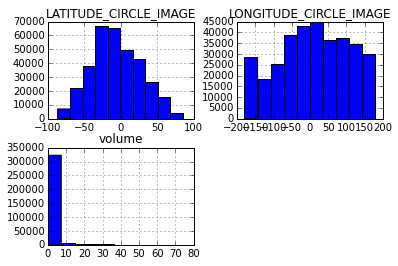

In [6]:
data.hist()
#(kind='hist')
#print data.volume.describe()

Results show most craters are almost normal distribution around equator. Longitude is more equaly distributed with most craters on the east side of Mars.

##Bivariate Graph

Lets verify if there is any correlation between volume of crater and its Latitude. Also to verify out hipothesis we will plot volume against Longitude, where we expect no correlation.

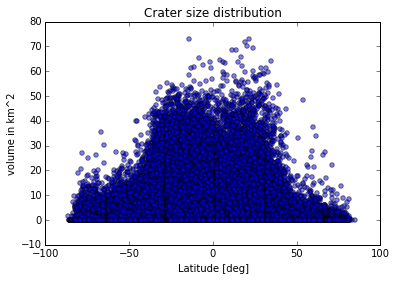

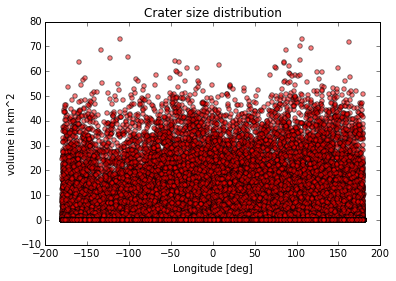

In [24]:
plt.scatter(data.LATITUDE_CIRCLE_IMAGE,data.volume, alpha=0.5)
plt.title("Crater size distribution")
plt.xlabel("Latitude [deg]")
plt.ylabel("volume in km^2")
plt.show()

plt.scatter(data.LONGITUDE_CIRCLE_IMAGE,data.volume, alpha=0.5, c= 'r', marker='o')
plt.title("Crater size distribution")
plt.xlabel("Longitude [deg]")
plt.ylabel("volume in km^2")
plt.show()

Plots above support our argument, showing correlation with latitude but not with longitude. Lets demonsrate 

##Summary

Analysis of the data seems to confirm hipothesis that most of craters on mars are due to foreign body impact, due to:
* their spatial distibution
* their volume vs spatial distribution

In both cases we can see correlation with latitude but not with longitude, supporting our argument. In order to summarise fundings I have plotted postion (latitude and longitude vs size of the crater). This show that:
* larges ammout of craters are located close to equator 
* largest craters in size (volume) are grupped in similiar way


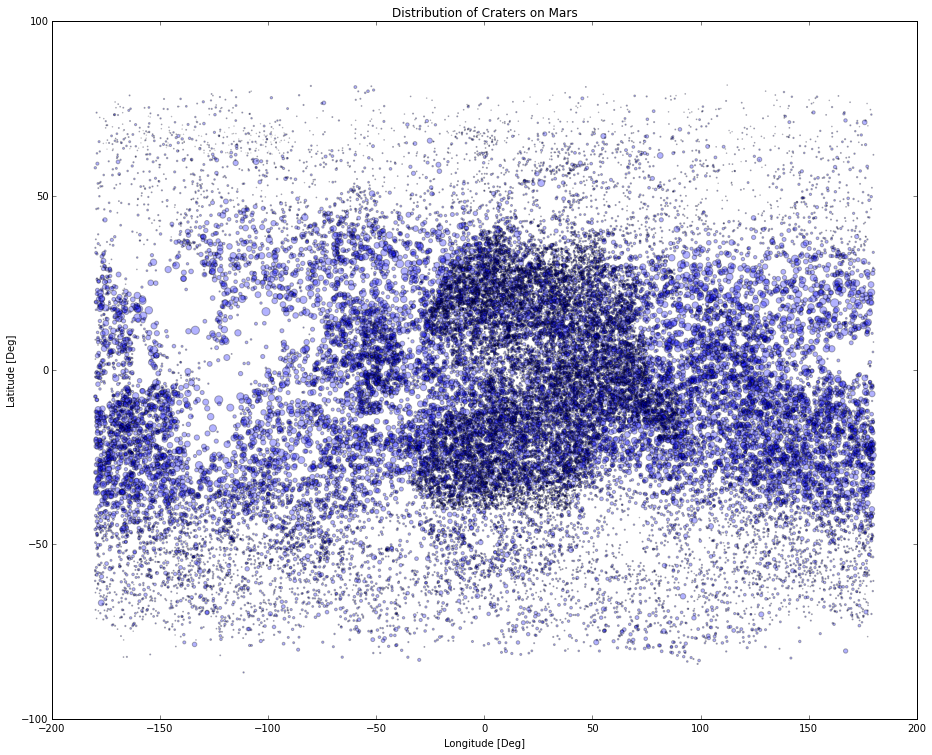

In [25]:
plt.scatter(data.LONGITUDE_CIRCLE_IMAGE,data.LATITUDE_CIRCLE_IMAGE,s=data.volume, alpha=0.3)
plt.title("Distribution of Craters on Mars")
plt.xlabel("Longitude [Deg]")
plt.ylabel("Latitude [Deg]")

fig = plt.gcf()
fig.set_size_inches(15.5, 12.5) 
plt.show()         

